In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import ceil, sqrt, floor
from random import randint

%matplotlib inline

In [447]:
class task_Image_Generator:
    def __init__(self, Height=480, Width=640, smallRectMin=150, smallRectMax=250):
        self.Height = Height
        self.Width = Width
        self.smallRectMin = smallRectMin
        self.smallRectMax = smallRectMax
    
    def get_random_color(self):
        return list(np.random.choice(range(256), size=3))
    
    def get_baze_image(self, color: list):
        image = np.zeros([self.Height,self.Width,3],dtype=np.uint8)
        image[:,:,0] = color[0]
        image[:,:,1] = color[1]
        image[:,:,2] = color[2]
        return image
    
    def generate_rect(self, rectHeight: int, rectWidth: int):
        Hippotenuse = sqrt(rectHeight**2 + rectWidth**2)
        centerPadding = ceil(Hippotenuse/2)+15
        #print("centerPadding: " + str(centerPadding))
        
        minH = centerPadding
        minW = centerPadding
        maxH = int(self.Height - minH)
        maxW = int(self.Width - minW)
        #print(maxH)
        #print(maxW)
        
        initH = randint(minH, maxH)
        initW = randint(minW, maxW)
        #print("initH: " + str(initH))
        #print("initW: " + str(initW))
        
        p0 = (int(initH-(rectHeight/2)), int(initW-(rectWidth/2)))
        p1 = (int(initH-(rectHeight/2)), int(initW+(rectWidth/2)))
        p2 = (int(initH+(rectHeight/2)), int(initW+(rectWidth/2)))
        p3 = (int(initH+(rectHeight/2)), int(initW-(rectWidth/2)))

        points = np.array([p0, p1, p2, p3])
        
        return points, initH, initW
    
    def rotate_points(self, points, M):
        Rot_points = []
        
        for point in points:
            new_point = [point[0], point[1], 1]
            comp_point = np.matmul(M, new_point)
            rot_point = [int(comp_point[0]), int(comp_point[1])]
            Rot_points.append(rot_point)
        
        return Rot_points
    
    def get_countor(self, points):
        for point in points:
            point[0], point[1] = point[1], point[0]
            
        return np.array(points).reshape((-1,1,2)).astype(np.int32)
    
    def get_final_image(self):
        baze_color = self.get_random_color()
        baze_image = self.get_baze_image(baze_color)
        
        points,cy,cx = self.generate_rect(randint(self.smallRectMin, self.smallRectMax), 
                                          randint(self.smallRectMin, self.smallRectMax))
        
        M = cv2.getRotationMatrix2D(center=(cy, cx), angle=randint(0, 89), scale=1)
        
        rotated_points = self.rotate_points(points, M)
        
        while True:
            smallRC = self.get_random_color()
            if smallRC != baze_color:
                break
        
        ctr = self.get_countor(rotated_points)
        cv2.drawContours(baze_image, [ctr], 0, (int(smallRC[0]), int(smallRC[1]), int(smallRC[2])), 
                         -1, cv2.LINE_AA)
        
        gray = cv2.cvtColor(baze_image, cv2.COLOR_BGR2GRAY)
        minGray = np.percentile(gray, 98)
        maxGray = np.percentile(gray, 2)
        meanGray = int((minGray + maxGray)/2)
        #print(minGray)
        #print(maxGray)
        
        ret,thresh_bin = cv2.threshold(gray,meanGray,255,cv2.THRESH_BINARY)
        contours, hierarchy = cv2.findContours(thresh_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        if contours: # chech that contours not empty
            for cnt in contours:
                area = cv2.contourArea(cnt)
                #print(area)
                if area > self.smallRectMin**2-2000 and area < self.smallRectMax**2+2000:
                    x,y,w,h = cv2.boundingRect(cnt)
                else:
                    x,y,w,h = None, None, None, None
        else:
            x,y,w,h = None, None, None, None
                 
                     
        return baze_image, rotated_points, x, y, w, h
    

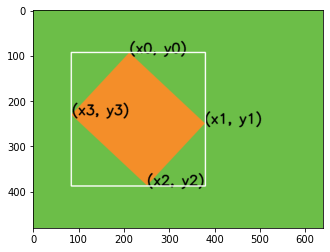

In [461]:
tig = task_Image_Generator()
image, points, x, y, w, h = tig.get_final_image()

for i, point in enumerate(points):
    cv2.putText(image, "(x{0}, y{0})".format(i), (point[0], point[1]), cv2.FONT_HERSHEY_SIMPLEX, 1, 
            (0,0,0), 2, cv2.LINE_AA)
if x != None:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,255),2)

plt.imshow(image)

In [ ]:
#Height=416, Width=416, smallRectMin=100, smallRectMax=200

In [ ]:
# a = np.array([4,4,4,4,4,4,4,4,4,4,5,5,5,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9])
# print(a)
# print(np.percentile(a, 30))

In [ ]:
#         cnt = contours[0]
#         area = cv2.contourArea(cnt)
#         if area > 20000 and area < 70000: #150*150 = 22500; 250*250 = 62500
#             x,y,w,h = cv2.boundingRect(cnt)
#         else:
#             x,y,w,h = None, None, None, None

In [ ]:
# def Recalculate_KeyPoints(key_points, H):
#     Rec_points = []

#     for point in key_points:
#         new_point = [point[0], point[1], 1]
#         comp_point = np.matmul(H, new_point)
#         #print(comp_point)
#         rec_point = [int(comp_point[0]), int(comp_point[1])]
#         Rec_points.append(rec_point)

#     return Rec_points

# tig = task_Image_Generator()
# color = tig.get_random_color()
# print(color)
# image = tig.get_baze_image(color)
# #print(image.shape)
# points,cy,cx = tig.generate_rect(randint(150, 250), randint(150, 250))
# print(points)
# for i, point in enumerate(points):
#     cv2.putText(image, str(i), (point[1], point[0]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_AA)
#     cv2.circle(image, (point[1], point[0]), radius=4, color=(0, 0, 0), thickness=2)
    
# cv2.circle(image, (cx, cy), radius=int(h/2), color=(255, 255, 255), thickness=2)
# #cv2.rectangle(image, (points[0][1], points[0][0]), (points[2][1], points[2][0]), (0,0,255), -1)
# M = cv2.getRotationMatrix2D(center=(cy, cx), angle=90, scale=1)
# print(M)
# rpoints45 = tig.rotate_points(points, M)
# print(rpoints)

# # rpoints45 = tig.rotate_points(points, 45)
# # print(rpoints45)
    
# #rpoints45 = tig.rotate_points(points, 45, cx, cy)
# #rpoints90 = tig.rotate_points(points, 90)

# cv2.drawContours(image, np.to_array(rpoints45, 0, (0, 0, 255), -1, cv2.LINE_AA)

# # for i, point in enumerate(rpoints45):
# #     cv2.putText(image, str(i), (point[1], point[0]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_AA)
# #     cv2.circle(image, (point[1], point[0]), radius=2, color=(0, 0, 0), thickness=2)
    
# # for i, point in enumerate(rpoints90):
# #     cv2.putText(image, str(i), (point[0], point[1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_AA)
# #     cv2.circle(image, (point[0], point[1]), radius=4, color=(0, 0, 0), thickness=2)
# plt.imshow(image)

In [ ]:
# tig.generate_rect(250, 150)

In [ ]:
# def rotate(points, angle):
#     ANGLE = np.deg2rad(angle)
#     c_x, c_y = np.mean(points, axis=0)
#     print(c_x)
#     print(c_y)
#     return np.array(
#         [
#             [
#                 c_x + np.cos(ANGLE) * (px - c_x) - np.sin(ANGLE) * (py - c_x),
#                 c_y + np.sin(ANGLE) * (px - c_y) + np.cos(ANGLE) * (py - c_y)
#             ]
#             for px, py in points
#         ]
#     ).astype(int)

# imgc = np.zeros((480, 640, 3), np.uint8)

# p0 = (100, 100)
# p1 = (100, 300)
# p2 = (200, 300)
# p3 = (200, 100)

# pp = np.array([p0, p1, p2, p3])
# print(pp)
# cv2.drawContours(imgc, [pp], 0, (0, 0, 255), -1, cv2.LINE_AA)
# plt.imshow(imgc)

# rpp = rotate(pp, angle=45)
# print(rpp)
# cv2.drawContours(imgc, [rpp], 0, (255, 0, 0), -1, cv2.LINE_AA)
# plt.imshow(imgc)

In [ ]:
# class Point:
#     def __init__(self, x, y):
#         self.x = int(x)
#         self.y = int(y)

# class Rectangle:
#     def __init__(self, x, y, w, h, angle):
#          # Center Point
#         self.x = int(x)
#         self.y = int(y)
#         # Height and Width
#         self.w = int(w)
#         self.h = int(h)
#         self.angle = int(angle)
        
#     def get_vertices_points(self):
#         x0, y0, width, height, _angle = self.x, self.y, self.w, self.h, self.angle
#         b = math.cos(math.radians(_angle)) * 0.5
#         a = math.sin(math.radians(_angle)) * 0.5
#         pt0 = Point(int(x0 - a * height - b * width), int(y0 + b * height - a * width))
#         pt1 = Point(int(x0 + a * height - b * width), int(y0 - b * height - a * width))
#         pt2 = Point(int(2 * x0 - pt0.x), int(2 * y0 - pt0.y))
#         pt3 = Point(int(2 * x0 - pt1.x), int(2 * y0 - pt1.y))
#         pts = [pt0, pt1, pt2, pt3]
#         return pts

#     def rotate_rectangle(self, theta):
#         pt0, pt1, pt2, pt3 = self.get_vertices_points()

#         # Point 0
#         rotated_x = math.cos(theta) * (pt0.x - self.x) - math.sin(theta) * (pt0.y - self.y) + self.x
#         rotated_y = math.sin(theta) * (pt0.x - self.x) + math.cos(theta) * (pt0.y - self.y) + self.y
#         point_0 = Point(rotated_x, rotated_y)

#         # Point 1
#         rotated_x = math.cos(theta) * (pt1.x - self.x) - math.sin(theta) * (pt1.y - self.y) + self.x
#         rotated_y = math.sin(theta) * (pt1.x - self.x) + math.cos(theta) * (pt1.y - self.y) + self.y
#         point_1 = Point(rotated_x, rotated_y)

#         # Point 2
#         rotated_x = math.cos(theta) * (pt2.x - self.x) - math.sin(theta) * (pt2.y - self.y) + self.x
#         rotated_y = math.sin(theta) * (pt2.x - self.x) + math.cos(theta) * (pt2.y - self.y) + self.y
#         point_2 = Point(rotated_x, rotated_y)

#         # Point 3
#         rotated_x = math.cos(theta) * (pt3.x - self.x) - math.sin(theta) * (pt3.y - self.y) + self.x
#         rotated_y = math.sin(theta) * (pt3.x - self.x) + math.cos(theta) * (pt3.y - self.y) + self.y
#         point_3 = Point(rotated_x, rotated_y)

#         return point_0, point_1, point_2, point_3
    
# imgc = np.zeros((480, 640, 3), np.uint8)

# rect = Rectangle(100, 100, 150, 200, 0)
# pp = rect.get_vertices_points()
# print(pp[0])

# # cv2.drawContours(imgc, [pp], 0, (0, 0, 255), -1, cv2.LINE_AA)
# # plt.imshow(imgc)

In [ ]:
#         points = np.array([[int(initW-(rectWidth/2)), int(initH-(rectHeight/2))], 
#                            [int(initW-(rectWidth/2)), int(initH+(rectHeight/2))], #+-
#                            [int(initW+(rectWidth/2)), int(initH+(rectHeight/2))],
#                            [int(initW+(rectWidth/2)), int(initH-(rectHeight/2))]]) #-+
#                            [initX + rectWidth, initY], 
#                            [initX, initY + rectHeight], 
#                            [initX + rectWidth, initY + rectHeight]])
        
#         print(minW)
#         print(minH)
#         print(maxW)
#         print(maxH)
        
        #print(centerPadding)
#         halfMaxWH = floor(max(rectWidth, rectHeight)/2)
        
#         minX = int(centerPadding - halfMaxWH)
#         minY = int(centerPadding - halfMaxWH)
#         maxX = int(self.Width - minX)
#         maxY = int(self.Height - minY)
        
#         initX = randint(minX, maxX)
#         initY = randint(minY, maxY)
        
#         points = np.array([[initX, initY], 
#                            [initX + rectWidth, initY], 
#                            [initX, initY + rectHeight], 
#                

#     def rotate_points(self, points, angle, cx, cy):
#         cost = np.cos(np.deg2rad(angle))
#         sint = np.sin(np.deg2rad(angle))
#         rot = np.array([[cost, -sint, 0],
#                        [sint, cost, 0],
#                        [0, 0, 1]])
        
#         Rot_points = []
#         for point in points:
#             new_point = [point[0], point[1], 1]
#             comp_point = np.matmul(rot, new_point)
#             rot_point = [int(comp_point[0]), int(comp_point[1])]
#             Rot_points.append(rot_point)

#         return Rot_points